In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
'2016-02-23'

# Perform a query to retrieve the data and precipitation scores
prep_score_values = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-02-23').all()
prep_score_values
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prep_score_values_df = pd.DataFrame(prep_score_values)
prep_score_values_df
# Sort the dataframe by date
prep_score_values_df.sort_values(by='date')
prep_score_values_df


,date,prcp
0,2016-02-24,0.00
1,2016-02-25,0.00
2,2016-02-26,0.00
3,2016-02-27,0.00
4,2016-02-28,0.00
...,...,...
3370,2017-08-19,0.09
3371,2017-08-20,NaN
3372,2017-08-21,0.56
3373,2017-08-22,0.50


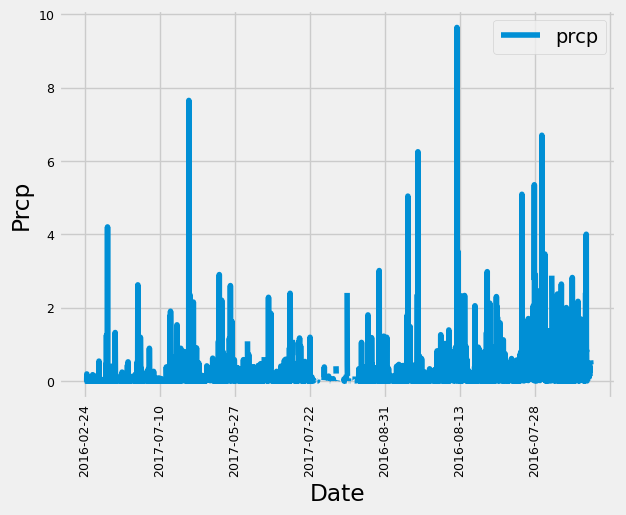

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
prep_score_values_df.plot('date', 'prcp')
plt.xlabel('Date')
plt.xticks(rotation=90, size = 9)
plt.ylabel('Prcp')
plt.yticks(size = 9)
plt.show()


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data

prep_score_values_df.describe()



,prcp
count,3040.000000
mean,0.185901
std,0.506594
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,9.640000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [26]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temps

[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp_summary = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>='2016-08-23').all()
temp_summary

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


<function matplotlib.pyplot.show(close=None, block=None)>

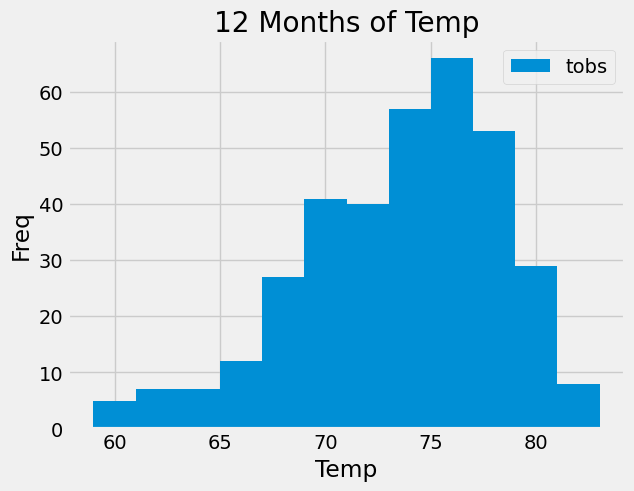

In [34]:
# and plot the results as a histogram
temp_summary_pd=pd.DataFrame(temp_summary,columns=['tobs'])
temp_summary_pd.plot.hist(bins=12)
plt.xlabel("Temp")
plt.ylabel("Freq")
plt.title("12 Months of Temp")
plt.show

# Close Session

In [35]:
# Close Session
session.close()